In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [283]:
boston = pd.read_csv('boston_house_prices.csv')

In [284]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [285]:
X = boston.drop('MEDV',axis=1)
y = boston['MEDV']

# 1. Lakukan analisa regresi biasa pada data Boston, jelaskan hasilnya.

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=24)

In [288]:
from sklearn.linear_model import LinearRegression

In [289]:
lm = LinearRegression()

In [290]:
lm.fit(X_train,y_train)

LinearRegression()

In [291]:
lm.intercept_

30.571641279638733

In [292]:
lm.coef_

array([-4.17663929e-02,  3.94687741e-02, -3.36654600e-02,  2.28607132e+00,
       -1.22960778e+01,  4.29227155e+00, -1.66358901e-02, -1.46868503e+00,
        2.66235871e-01, -1.39477142e-02, -8.81647472e-01,  1.06228195e-02,
       -4.53319925e-01])

In [293]:
predictions = lm.predict(X_test)

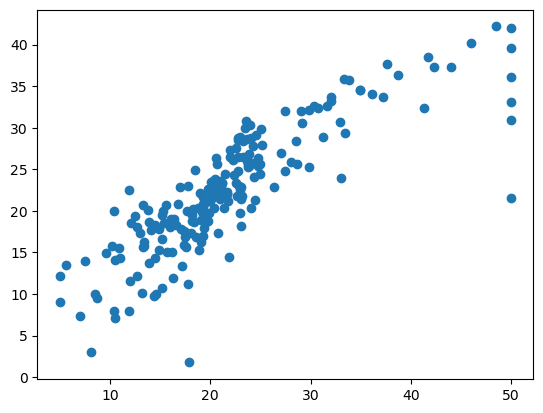

In [294]:
plt.scatter(y_test,predictions)

In [295]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.362375083224377
MSE: 23.027998591220392
RMSE: 4.798749690411076


In [296]:
rm=np.sqrt(metrics.mean_squared_error(y_test, predictions))
sd=boston['MEDV'].std()
ratio=rm/sd
ratio

0.5217674655868987

Didapatkan hasil MAE dan RMSE yang lebih kecil dari standar deviasi data target, dapat dinyatakan bahwa error yang dimiliki model relatif kecil. Grafik menunjukan bahwa data tersebar pada daerah garis diagonal walaupun ada beberapa data yang tidak bisa diprediksi secara akurat. Model tersebut dapat membuat prediksi dengan cukup akurat.

# 2.  Lakukan regresi Lasso pada data Boston, jelaskan hasilnya.

In [304]:
lasso = Lasso(alpha=0.01)

In [305]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [306]:
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.7091316014695126, 0.7456976917530358)

In [307]:
lasso.coef_

array([-0.03800024,  0.03980203, -0.04783215,  2.14208052, -8.76004035,
        4.30305975, -0.01975009, -1.418389  ,  0.25943986, -0.01434857,
       -0.84141694,  0.01081951, -0.45916253])

In [308]:
prediction_lasso=lasso.predict(X_test)

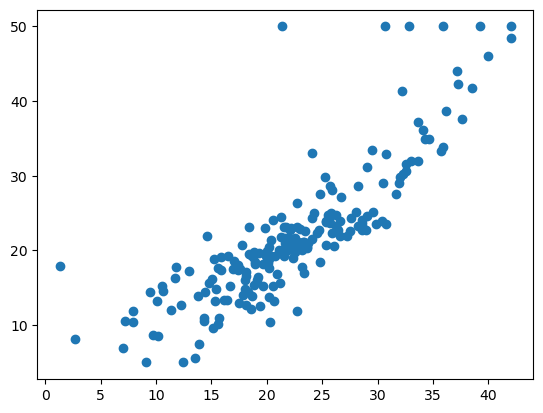

In [309]:
plt.scatter(prediction_lasso,y_test)

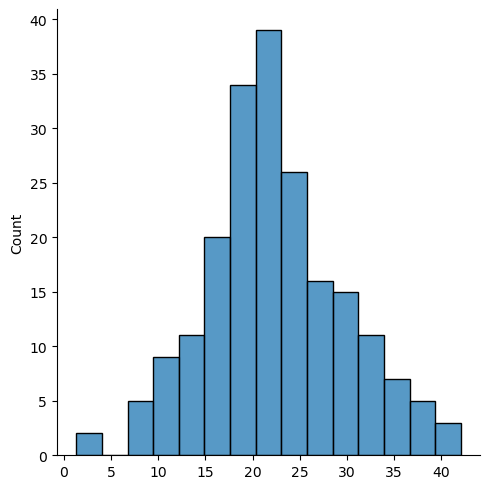

In [310]:
sns.displot(prediction_lasso)

In [311]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_lasso))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

MAE: 3.381298381009158
MSE: 23.395533677457422
RMSE: 4.836892977672488


In [312]:
rm=np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso))
sd=boston['MEDV'].std()
ratio=rm/sd
ratio

0.5259147805350628

Didapatkan hasil MAE dan RMSE yang lebih kecil dari standar deviasi data target, dapat dinyatakan bahwa error yang dimiliki model relatif kecil. Namun, dapat dilihat bahwa tidak ada koefisien variabel yang dieliminasi oleh lasso dengan nilai alpha yang sudah disesuaikan. Dapat dinyatakan bahwa semua variabel signifikan. Grafik menunjukan bahwa data tersebar pada daerah garis diagonal walaupun ada beberapa data yang tidak bisa diprediksi secara akurat. 

# 3. Bandingkan 1 dan 2

Hasil dari regresi biasa dan lasso memberikan hasil yang mirip. Regresi biasa mendapatkan ratio sebesar 0.522 dan lasso mendapatkan ratio sebesar 0.526. Hasilnya tidak berbeda jauh karena pada lasso tidak terjadi elimnasi variabel dengan perubahan koefisien menjadi 0. 

# 4. Lakukan analisa feature selection pada data soccer, jelaskan hasilnya. Lakukan pula analisa regresi Lasso pada data itu. Jelaskan hasilnya.

In [317]:
from sklearn.ensemble import ExtraTreesClassifier

In [318]:
soccer = pd.read_csv('soccer.csv').set_index('id')

In [319]:
soccer.isnull().sum()

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

In [320]:
soccer = soccer.dropna(axis=0, how='any')

In [321]:
soccer.isnull().sum()

player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0


### Feature Selection

In [328]:
X = soccer.drop('overall_rating',axis=1)
Y = soccer['overall_rating']
X = X.drop(['date','attacking_work_rate','defensive_work_rate'],axis=1) #drop unnecessary data

In [329]:
soccer['preferred_foot'] = soccer['preferred_foot'].replace({'right':0, 'left':1})

[0.01911637 0.02192357 0.06977804 0.01114475 0.02714905 0.02922722
 0.02888999 0.03202669 0.02235329 0.03135457 0.02121412 0.01971879
 0.02639267 0.03740897 0.02610915 0.02697595 0.02267776 0.03945218
 0.02145864 0.02598684 0.02308502 0.02759614 0.02752096 0.02457376
 0.0256429  0.03000953 0.03016137 0.0261667  0.02127137 0.03126562
 0.03364999 0.02854358 0.0238988  0.0220549  0.01918709 0.02239592
 0.02261775]


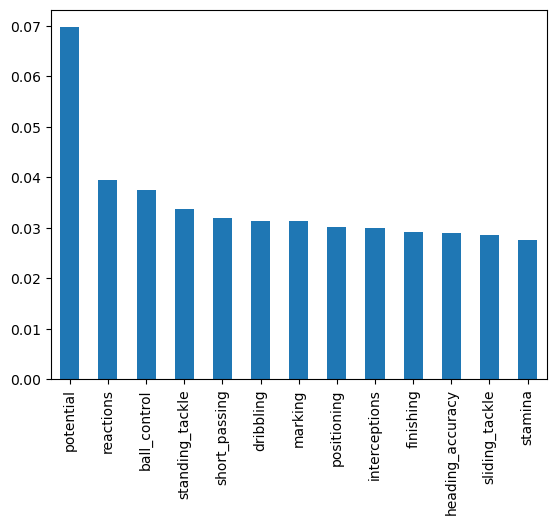

In [330]:
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot.bar()
plt.show()
list1=feat_importances.keys().to_list()

In [331]:
cor_target = abs(soccer.corr()["overall_rating"])
cor_target

player_fifa_api_id    0.278703
player_api_id         0.328315
overall_rating        1.000000
potential             0.765435
preferred_foot        0.001417
crossing              0.357320
finishing             0.330079
heading_accuracy      0.313324
short_passing         0.458243
volleys               0.361739
dribbling             0.354191
curve                 0.357566
free_kick_accuracy    0.349800
long_passing          0.434525
ball_control          0.443991
acceleration          0.243998
sprint_speed          0.253048
agility               0.239963
reactions             0.771856
balance               0.160211
shot_power            0.428053
jumping               0.258978
stamina               0.325606
strength              0.315684
long_shots            0.392668
aggression            0.322782
interceptions         0.249094
positioning           0.368978
vision                0.431493
penalties             0.392715
marking               0.132185
standing_tackle       0.163986
sliding_

In [332]:
relevant_features = cor_target[cor_target>0.4]
list4=relevant_features.keys().to_list()
list4

['overall_rating',
 'potential',
 'short_passing',
 'long_passing',
 'ball_control',
 'reactions',
 'shot_power',
 'vision']

### Lasso 

In [333]:
X = soccer[['potential','short_passing','long_passing','ball_control','reactions',
           'shot_power','vision']]
Y = soccer[['overall_rating']]

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=24)

In [393]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.7577891198240199, 0.7587896622342195)

In [394]:
lasso.coef_

array([ 0.50033179,  0.        ,  0.05252222, -0.03344118,  0.35308867,
        0.04387694, -0.01603218])

In [395]:
prediction_lasso=lasso.predict(X_test)

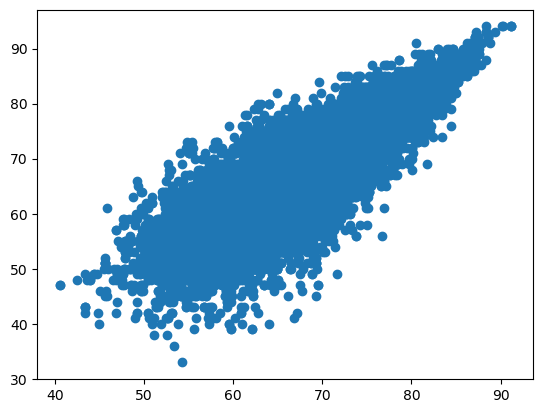

In [396]:
plt.scatter(prediction_lasso,y_test)

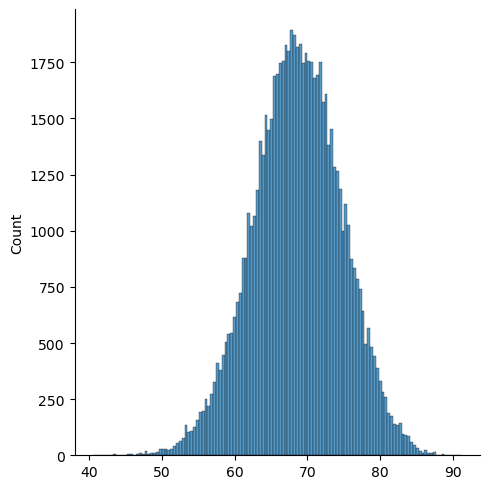

In [397]:
sns.displot(prediction_lasso)

In [398]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_lasso))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

MAE: 2.585842242691981
MSE: 11.901370335046643
RMSE: 3.4498362765567068


In [399]:
rm=np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso))
sd=boston['MEDV'].std()
ratio=rm/sd
ratio

0.37510027545415514

Setelah melakukan feature selection, data yang digunakan hanya 'overall_rating','potential', 'short_passing','long_passing','ball_control','reactions','shot_power','vision'. Saat dilakukan regresi lasso, variabel 'short_passing' mendapatkan koefisien 0, dimana artinya variabel tersebut tidak signifikan. Didapatkan hasil ratio sebesar 0.375. Grafik menunjukan kepadatan data yang cukup tinggi di sekitar garis diagonal. Oleh karena itu dapat disimpulkan bahwa model memiliki performa yang cukup baik.

In [405]:
! jt -r

Reset css and font defaults in:
C:\Users\willi\.jupyter\custom &
C:\Users\willi\AppData\Roaming\jupyter\nbextensions
